# Laboratorio 1 

**Brandon Sicay - 21757** 
**Daniel Morales - 21**

## Importar las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder





## Importar el conjunto de datos


In [7]:
path = "dataset_phishing.csv"

data = pd.read_csv(path)

data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


## Verificar si los datos estan balanceados mediante el conteo de instancias para cada clase de nuestra columna objetivo

In [6]:
y = 'status'

conteo_clases = data[y].value_counts() 
# imprime el número de instancias (filas) por cada clase 
print(conteo_clases)

porcentaje_clases = conteo_clases / len(data) * 100
print(porcentaje_clases)



legitimate    5715
phishing      5715
Name: status, dtype: int64
legitimate    50.0
phishing      50.0
Name: status, dtype: float64


#### Podemos observar que nuestro dataset esta perfectamente balanceado, contando con la misma cantidad de instancias para url's pertenecientes a phising y legítimas


## Codificar datos 


### Feature selection

| URL based features        | Content based features    | External features  |
|---------------------------|---------------------------|--------------------|
| IP - 01                   | hyperlinks int            | whois 01           |
| HTTPS token 01              | external css int          | domain age int     |
| radio of digits float     | login forms 01            | web traffic int    |
| punycode 01               | external favicon 01       | dns record 01      |
| port 01                   | links in tags float       | google index 01    |
| tld 01                    | submit to email 01        |                    |
| abnormal subdomains 01    | invisible iframe 01       |                    |
| subdomains int            | pop up window 01          |                    |
| prefix suffix 01          | right click 01            |                    |
| shortening service 01     | domain in title 01        |                    |
| path extension 01         |                           |                    |
| phish hints int           |                           |                    |
| brand domains 01          |                           |                    |
| statical report 01        |                           |                    |

**Para Variables Binarias (0/1):**

- Encoding: No necesitan encoding adicional ya que ya están en formato numérico.
- Escalado:N o se requiere escalado ya que están en un rango  (0, 1).


**Para Variables Numéricas (Int, Float):**

- Encoding: No necesitan encoding ya que son numéricas.
- Escalado: Se usará estandarización (StandardScaler en Scikit-learn)

### Feature Scaling de la variable independiente

In [14]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaled_features = scaler.fit_transform(data[['ratio_digits_url', 'ratio_digits_host', 'nb_subdomains', 'phish_hints', 'nb_hyperlinks', 'nb_extCSS', 'links_in_tags', 'domain_age', 'web_traffic']])

# features binarias
binary_features = data[['ip', 'https_token', 'punycode' , 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'shortening_service', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'statistical_report', 'login_form', 'external_favicon', 'submit_email', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'domain_in_title', 'whois_registered_domain']]

# Combina las características escaladas con las binarias
combined_features = np.concatenate([scaled_features, binary_features], axis=1)
print(combined_features)

[[-0.59465091 -0.26786842  1.20609049 ...  0.          0.
   0.        ]
 [ 1.87605348 -0.26786842 -1.93342541 ...  0.          1.
   0.        ]
 [ 1.09285634 -0.26786842  1.20609049 ...  0.          1.
   0.        ]
 ...
 [ 1.00404016 -0.26786842 -0.36366746 ...  0.          0.
   0.        ]
 [-0.59465091 -0.26786842 -0.36366746 ...  0.          1.
   0.        ]
 [ 0.36724497  8.1428769   1.20609049 ...  0.          1.
   1.        ]]


 ## Split para training, testing 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(combined_features, data['status'], test_size=0.2, random_state=1)


## Feature Importance


<function matplotlib.pyplot.show(close=None, block=None)>

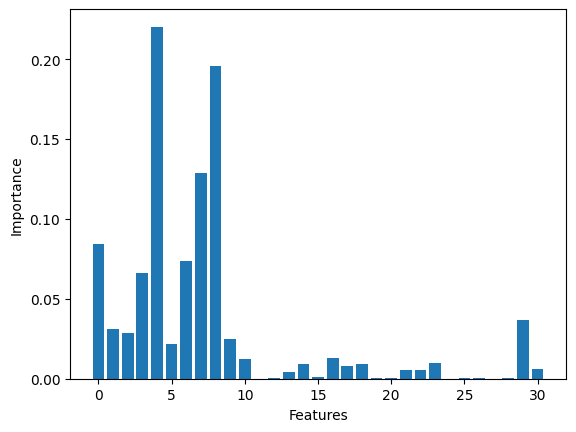

In [21]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Se utilzará la técnica de feature importance, la cual utiliza la métrica de Impureza de Gini, que mide 
# la disminución de la impureza del árbol causada por un feature

model = RandomForestClassifier()
model.fit(X_train, y_train)

# obtener las importancias 
importances = model.feature_importances_

plt.bar(range(X_train.shape[1]), importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show


In [22]:
print(X_train)

[[ 1.07956887 -0.26786842  1.20609049 ...  0.          1.
   0.        ]
 [-0.59465091 -0.26786842  1.20609049 ...  0.          1.
   0.        ]
 [ 0.1391745  -0.26786842  1.20609049 ...  0.          1.
   0.        ]
 ...
 [ 2.20305846  3.1852235   1.20609049 ...  0.          1.
   0.        ]
 [-0.07414684 -0.26786842 -0.36366746 ...  0.          0.
   0.        ]
 [-0.59465091 -0.26786842  1.20609049 ...  0.          1.
   0.        ]]
